100%|██████████| 2000/2000 [00:02<00:00, 720.51it/s]


Removed no burn in


100%|██████████| 2000/2000 [00:03<00:00, 637.63it/s]


Removed no burn in


100%|██████████| 2000/2000 [00:16<00:00, 117.74it/s]


Removed no burn in


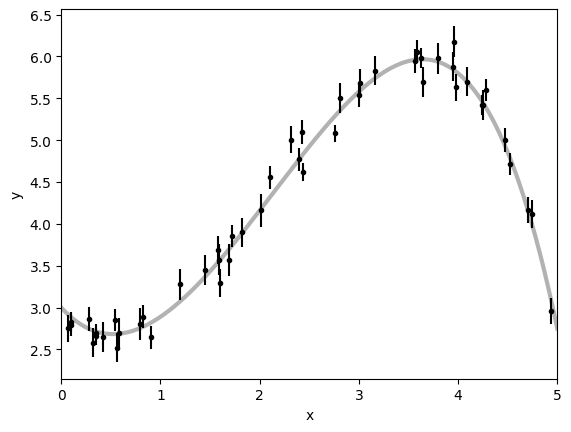

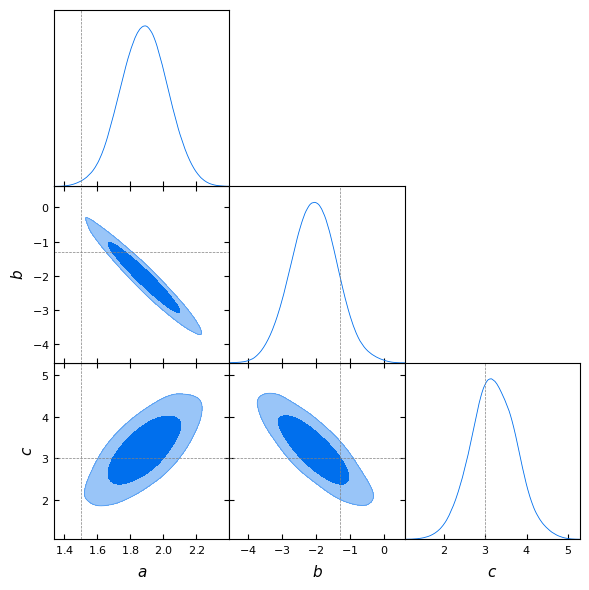

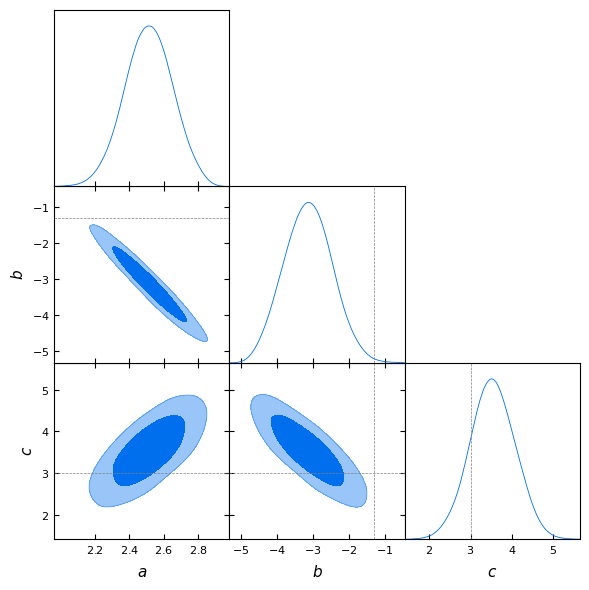

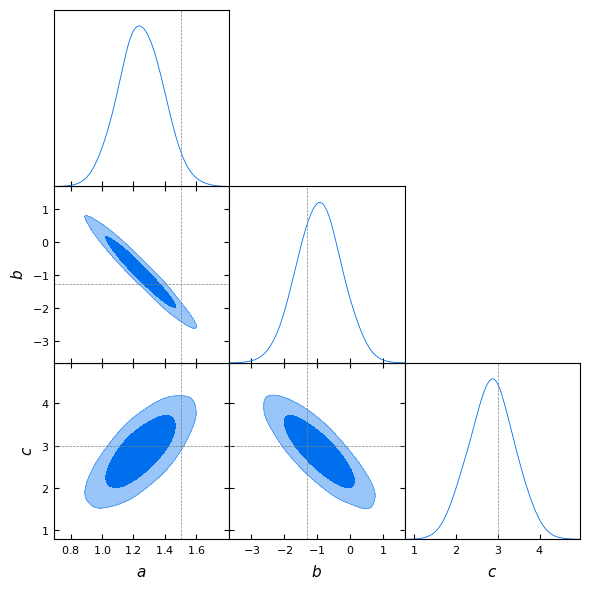

100%|██████████| 50/50 [00:29<00:00,  1.68it/s]


Applying PSIS on 50 data points


100%|██████████| 50/50 [00:06<00:00,  8.23it/s]


Applying PSIS on 50 data points


100%|██████████| 50/50 [00:04<00:00, 10.95it/s]


Applying PSIS on 50 data points


100%|██████████| 50/50 [00:00<00:00, 1706.04it/s]


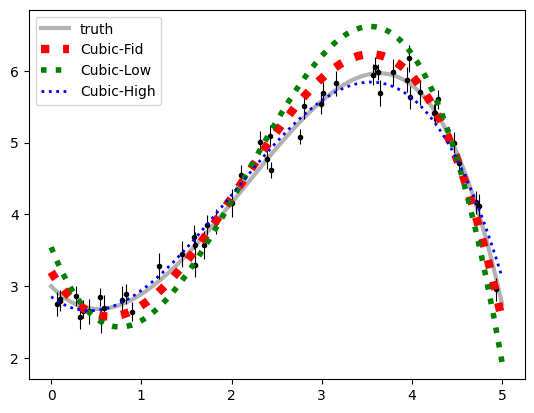

cubic fid initial guess:
[ 1.88368745 -2.05227245  3.19938871]
cubic low initial guess:
[ 2.515626   -3.1494147   3.54402315]
cubic high initial guess:
[ 1.25174889 -0.95513022  2.8547543 ]


In [2]:

import nfcof_arviz3_1 as pab
import numpy as np

params=[3.0, -1.3, 1.5, -0.35, 0.045, -0.005]


gdsamplescubiclow,gdsamplescubicfid,gdsamplescubichigh,ardatacubiclow,ardatacubicfid,ardatacubichigh, elpds, explppds = pab.createfit(params,
                                                                                                            0.1,0.1,0,[0,5],11,50,-0.3,0.09, 
                                                                                                            True, True, True)



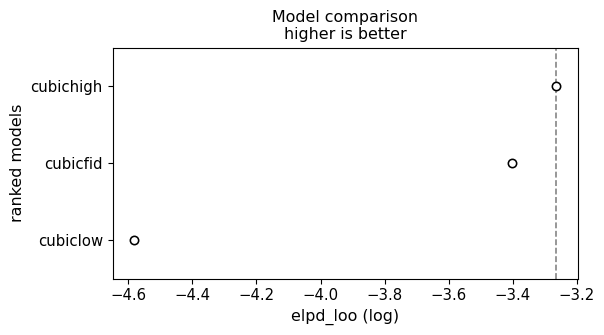

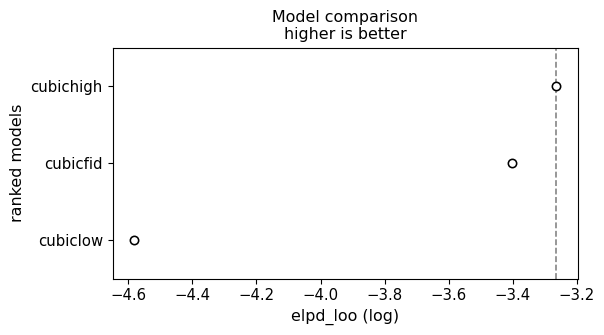

In [3]:
pbmaweights,stackweights, log_weights =pab.runarviz(ardatacubiclow,ardatacubicfid,ardatacubichigh)



In [4]:
# to create proper pbma and stacking weights
import numpy as np
modellist=["cubichigh","cubicfid","cubiclow"]
i=0
explppds2=np.zeros((3,4064))
for name in modellist:
    explppds2[i]=np.exp(log_weights[name].values)
    i+=1
    

pbmaweights4array, stackweights4array = pab.calcweights_mine(elpds, explppds2)
pbmaweights3array, stackweights3array = pab.calcweights_mine(elpds, explppds)
pbmaweights2array, stackweights2array = pab.calcweights_arviz(elpds)

pbmaweights2 = {'cubichigh': pbmaweights2array[2], 'cubicfid': pbmaweights2array[0], 'cubiclow': pbmaweights2array[1]}
stackweights2 = {'cubichigh': stackweights2array[2], 'cubicfid': stackweights2array[0], 'cubiclow': stackweights2array[1]}
pbmaweights3 = {'cubichigh': pbmaweights3array[2], 'cubicfid': pbmaweights3array[0], 'cubiclow': pbmaweights3array[1]}
stackweights3 = {'cubichigh': stackweights3array[2], 'cubicfid': stackweights3array[0], 'cubiclow': stackweights3array[1]}
pbmaweights4 = {'cubichigh': pbmaweights4array[2], 'cubicfid': pbmaweights4array[0], 'cubiclow': pbmaweights4array[1]}
stackweights4 = {'cubichigh': stackweights4array[2], 'cubicfid': stackweights4array[0], 'cubiclow': stackweights4array[1]}

# 1 is full arviz
# 2 is arviz methods, my importance sampling
# 3 is full mine
# 4 is arviz importance sampling, my (stacking) method

print("Arviz ImpSamp and Weight - pbma")
print(pbmaweights)
print("My ImpSamp, Arviz Methods - pbma")
print(pbmaweights2)
print("All mine - pbma")
print(pbmaweights3)
print("Arviz ImpSamp and My Weight - pbma")
print(pbmaweights4)


print("Arviz ImpSamp and Weight - Stacking")
print(stackweights)
print("My ImpSamp, Arviz Methods - Stacking")
print(stackweights2)
print("All mine - Stacking")
print(stackweights3)
print("Arviz ImpSamp and My Weight - Stacking")
print(stackweights4)




Arviz ImpSamp and Weight - pbma
cubichigh    0.468073
cubicfid     0.406987
cubiclow     0.124940
Name: weight, dtype: float64
My ImpSamp, Arviz Methods - pbma
{'cubichigh': 0.42151333154735815, 'cubicfid': 0.38795584979485676, 'cubiclow': 0.19053081865778512}
All mine - pbma
{'cubichigh': 0.42151333154735815, 'cubicfid': 0.38795584979485676, 'cubiclow': 0.19053081865778512}
Arviz ImpSamp and My Weight - pbma
{'cubichigh': 0.42151333154735815, 'cubicfid': 0.38795584979485676, 'cubiclow': 0.19053081865778512}
Arviz ImpSamp and Weight - Stacking
cubichigh    1.000000e+00
cubicfid     0.000000e+00
cubiclow     2.220446e-16
Name: weight, dtype: float64
My ImpSamp, Arviz Methods - Stacking
{'cubichigh': 0.9999999999999996, 'cubicfid': 7.494005416219807e-16, 'cubiclow': 0.0}
All mine - Stacking
{'cubichigh': 0.9999999999999996, 'cubicfid': 0.0, 'cubiclow': 7.494005416219807e-16}
Arviz ImpSamp and My Weight - Stacking
{'cubichigh': 8.326672684688674e-17, 'cubicfid': 1.0, 'cubiclow': 0.0}
